# Simple Linear Regression


#### Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Import dataset


In [2]:
df = pd.read_csv('canada_per_capita_income.csv')
df.head()


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [3]:
df.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [4]:
df.sample(8)

,year,per capita income (US$)
17,1987,12974.806620
28,1998,16622.671870
46,2016,34229.193630
16,1986,11482.891530
1,1971,3768.297935
24,1994,15755.820270
43,2013,42676.468370
41,2011,42334.711210


In [5]:
df.shape

(47, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


#### Statistics of data


In [7]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


##### visualization

C:\Users\Aksystems\AppData\Local\Temp\ipykernel_5144\2548092652.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['per capita income (US$)'])


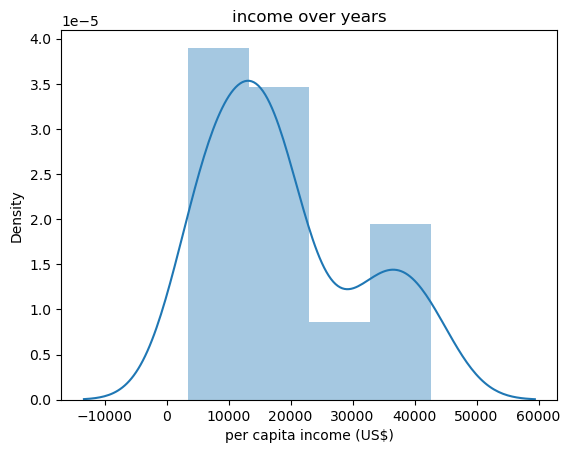

In [8]:
plt.title('income over years')
sns.distplot(df['per capita income (US$)'])
plt.show()

### Visualization 
##### Relationship between years and income


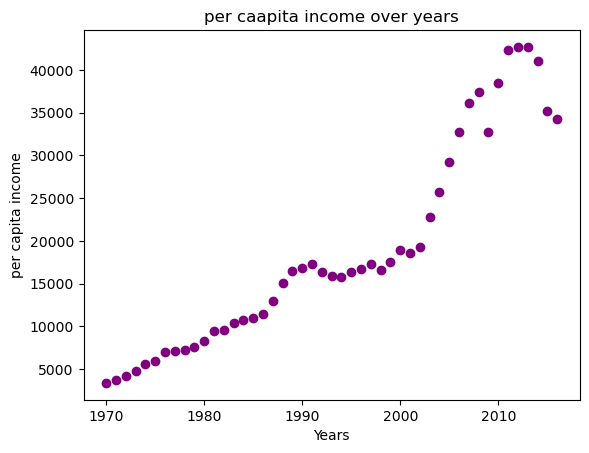

In [9]:
plt.scatter(df['year'], df['per capita income (US$)'], color = 'purple')
plt.title('per caapita income over years')
plt.xlabel('Years')
plt.ylabel('per capita income')
plt.show()

### Splitting data into features and target
#### or dependant & independant variables 

In [10]:
feature = df.iloc[:, :1]  # independent
target = df.iloc[:, 1:]  # dependent

In [11]:
feature

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


#### Splitting into Training/Test sets


In [12]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)

In [13]:
y_test

,per capita income (US$)
27,17310.757750
39,32755.176820
26,16699.826680
43,42676.468370
24,15755.820270
36,32738.262900
12,9619.438377
19,16426.725480
4,5576.514583
25,16369.317250


### creating model

In [14]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### Predict Results


In [15]:
# Prediction result
y_pred_test = reg.predict(X_test)     # predicted value of y_test
y_pred_train = reg.predict(X_train)   # predicted value of y_train

In [16]:
y_pred_test

array([[22279.39968245],
       [32061.10983855],
       [21464.25716944],
       [35321.67989059],
       [19833.97214342],
       [29615.68229953],
       [10052.26198731],
       [15758.25957838],
       [ 3531.12188324],
       [20649.11465643]])

In [17]:
y_pred_train

array([[ 6791.69193528],
       [ 2715.97937023],
       [ 5161.40690926],
       [32876.25235156],
       [27170.2547605 ],
       [10867.40450032],
       [14127.97455236],
       [36136.8224036 ],
       [12497.68952634],
       [ 7606.83444829],
       [13312.83203935],
       [23909.68470847],
       [26355.11224749],
       [36951.96491661],
       [  270.55183121],
       [25539.96973448],
       [24724.82722147],
       [ 4346.26439625],
       [ 9237.1194743 ],
       [27985.39727351],
       [ 1085.69434421],
       [33691.39486457],
       [17388.54460439],
       [ 1900.83685722],
       [28800.53978652],
       [19018.82963041],
       [30430.82481254],
       [ 8421.9769613 ],
       [18203.6871174 ],
       [14943.11706537],
       [37767.10742962],
       [16573.40209138],
       [ 5976.54942227],
       [34506.53737758],
       [11682.54701333],
       [23094.54219546],
       [31245.96732555]])

## Visualize predictions


### Prediction on test set


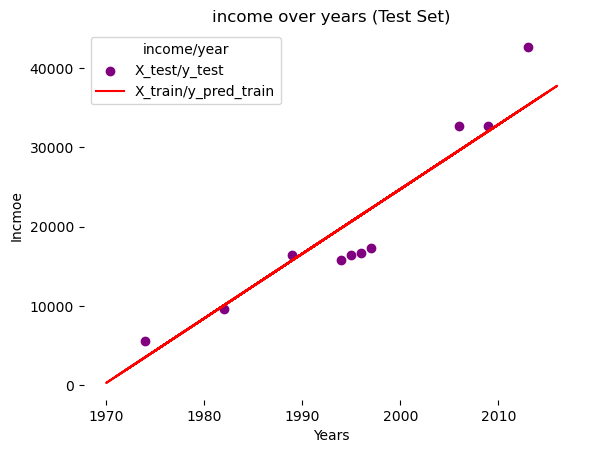

In [18]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'purple')
plt.plot(X_train, y_pred_train, color = 'red')
plt.title('income over years (Test Set)')
plt.xlabel('Years')
plt.ylabel('Incmoe')
plt.legend(['X_test/y_test', 'X_train/y_pred_train'], title = 'income/year', loc='best', facecolor='white')
plt.box(False)
plt.show()

## evaluation of model
### Coefficient and Intercept


In [19]:
coefficient = reg.coef_
intercept = reg.intercept_

In [20]:
print('y = ', intercept, '+', coefficient, '* X')

y =  [-1605560.19879643] + [[815.14251301]] * X


In [21]:
MSE =  mean_squared_error(y_test, y_pred_test )
R2 = r2_score(y_test, y_pred_test )
RMSE =  np.sqrt(mean_squared_error(y_test, y_pred_test ))
print( 'MSE=', MSE)
print('R2=' , R2)
print('RMSE=' , RMSE)

MSE= 15147815.5477862
R2= 0.8751771396846304
RMSE= 3892.0194690913613


In [23]:
accuracy = int(R2*100)

In [24]:
print('accuracy=' , accuracy, '%')

accuracy= 87 %


#### loading the dataset for evaluating the model
### evaluation Dataframe

In [25]:
test_df = pd.read_csv('years.csv')

In [26]:
test_df

,year
0,1978
1,1979
2,1980
3,1981
4,1982
5,1992
6,1993
7,1994
8,1995
9,1996


In [27]:
test_df.columns

Index(['year'], dtype='object')

In [28]:
y_pred_test = reg.predict(test_df)

In [29]:
y_pred_test

array([[ 6791.69193528],
       [ 7606.83444829],
       [ 8421.9769613 ],
       [ 9237.1194743 ],
       [10052.26198731],
       [18203.6871174 ],
       [19018.82963041],
       [19833.97214342],
       [20649.11465643],
       [21464.25716944],
       [22279.39968245],
       [23094.54219546],
       [23909.68470847],
       [24724.82722147],
       [25539.96973448],
       [26355.11224749],
       [33691.39486457],
       [34506.53737758],
       [35321.67989059],
       [36136.8224036 ],
       [36951.96491661],
       [37767.10742962],
       [38582.24994263],
       [39397.39245564],
       [40212.53496864],
       [41027.67748165],
       [41842.81999466]])

In [30]:
test_df['predicted_income'] = y_pred_test

In [31]:
test_df

,year,predicted_income
0,1978,6791.691935
1,1979,7606.834448
2,1980,8421.976961
3,1981,9237.119474
4,1982,10052.261987
5,1992,18203.687117
6,1993,19018.829630
7,1994,19833.972143
8,1995,20649.114656
9,1996,21464.257169


### visualization of predictions of evaluation dataset

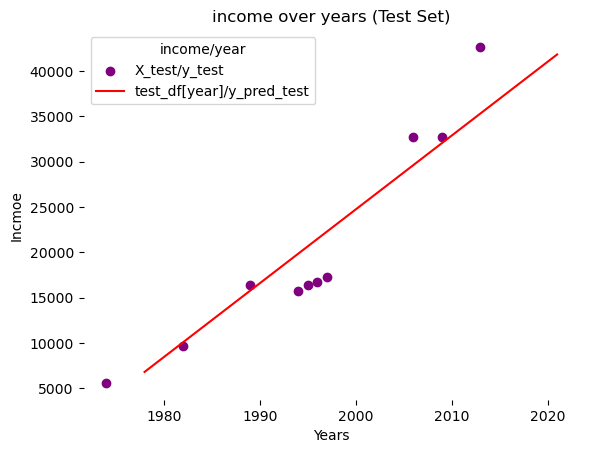

In [32]:
# Prediction on test set
plt.scatter(X_test, y_test , color = 'purple')
plt.plot(test_df['year'], test_df['predicted_income'] , color = 'red')
plt.title('income over years (Test Set)')
plt.xlabel('Years')
plt.ylabel('Incmoe')
plt.legend(['X_test/y_test', 'test_df[year]/y_pred_test'], title = 'income/year', loc='best', facecolor='white')
plt.box(False)
plt.show()

#### saving the predictions

In [34]:
test_df.to_csv("prediction.csv", index=False)